# Market Research: Evaluating Market Demand for Smart Pen
The objective of this project is to gain experience with working with secondary data. This notebook defaults to Python 3, as R is ill-suited to string manipulaiton. However, I also wrote some R code for certain cells, because those tasks are more convinient to run in R. 

The main data source for this project is from a json file of metadata (descriptions, price, salesrank, brand info, and co-purchasing links) for over 600K office and electronic products listed on Amazon and a json file containing over 9 million customer ratings and reviews for the above products. You can check the description of the data source here http://jmcauley.ucsd.edu/data/amazon/

**Step 1:** 
Write a function `filter_products_raw` that takes one argument (`key_phrase`) and returns a list of strings; these strings will be all the lines in the `products.json` file which contain the specified key phrase.

In [1]:
#load the products.json
import json
# read file
with open('products.json', 'r') as myfile:
    product = myfile.read()

In [2]:
len(product)

829501993

In [3]:
#check the first 3 elements
from itertools import islice
with open('products.json', 'r') as myfile:
    head = list(islice(myfile, 3))
print(head)

["{'asin': '0132793040', 'imUrl': 'http://ecx.images-amazon.com/images/I/31JIPhp%2BGIL.jpg', 'description': 'The Kelby Training DVD Mastering Blend Modes in Adobe Photoshop CS5 with Corey Barker is a useful tool for becoming familiar with the use of blend modes in Adobe Photoshop. For those who are serious about mastering all that Photoshop has to offer, mastering blend modes is just as important as mastering layers.In this DVD tutorial, seasoned expert Corey Barker explores the function of blend modes in a variety of scenarios such as image restoration, sharpening, adjustments, special effects and much more. Since every project scenario is different, Corey encourages you to experiment with these blend modes by giving you the skills and confidence you need.', 'categories': [['Electronics', 'Computers & Accessories', 'Cables & Accessories', 'Monitor Accessories']], 'title': 'Kelby Training DVD: Mastering Blend Modes in Adobe Photoshop CS5 By Corey Barker'}\n", "{'asin': '0321732944', 'i

In [4]:
import demjson
from tqdm import tqdm_notebook

#first filter those with certain key words
def filter_products_raw1(key_phrase):
    res = []
    data = open('products.json')
    for line in tqdm_notebook(data):
        if key_phrase in line:
            res.append(line)
    return res

In [5]:
#then only select those with key_phrase in title
def filter_products_raw(key_phrase):
    res = []
    k_list = filter_products_raw1(key_phrase)
    for line in k_list: 
        product_dict1 = demjson.decode(line) 
        if 'title' in product_dict1:
            if key_phrase in product_dict1['title']:
                res.append(product_dict1)
    return res

**Step 2:** 
Using the `filter_products_raw` function, try different key words or phrases to find a collection of products. 

In [6]:
smartpen = filter_products_raw('Smartpen')
smartpen1 = filter_products_raw('smart pen')
smartpen2 = filter_products_raw('smartpen')
smartpen3 = filter_products_raw('Smart Pen')
smartnotebook = filter_products_raw('Smart Notebook')

In [7]:
#check the length of each list
len(smartpen), len(smartpen1), len(smartpen2), len(smartpen3), len(smartnotebook)

(22, 1, 1, 6, 8)

In [8]:
#take a look at the head of smartpen
head = list(islice(smartpen, 3))
print(head)

[{'asin': 'B001AAOZHI', 'categories': [['Electronics', 'Portable Audio & Video', 'Digital Voice Recorders']], 'description': 'From the ManufacturerCapture EverythingThe Pulse smartpen records audio and links it to what you write. Missed something? Tap on your notesNo Need to Lug the LaptopThe Pulse smartpen automatically captures everything as you write and draw. Transfer your notes to your computer, organize them, and even search for words within your notes. Find what you want in seconds.Share Your NotesTransform your notes and audio into interactive movies. Upload your creations online for everyone to see, hear and play.What You GetThe Pulse smartpen (1.3 ounces, anodized aluminum housing)1 GB of memory (actual user available memory will be less)Livescribe Desktop software (download)3-D Recording Headset100 sheet dot paper college-ruled notebookUSB mobile charging cradleSmartpen case2 black fine point ink cartridgesDemo card and interactive stickersInteractive Getting Started GuideWh

**Step 3:** Based on the `filter_products_raw` function, write a new function `filter_products_df` that returns a pandas data frame with two columns: `product.id` and `price`. Ignore those prices are missing.

In [9]:
import pandas as pd

def filter_products_df(key_phrase):
    data = {'product.id':[], 'price':[]}
    key_list = filter_products_raw(key_phrase)
    for line in key_list:
        product_dict = demjson.decode(str(line))
        if 'price' in product_dict:
            data['product.id'].append(product_dict['asin'])
            data['price'].append(product_dict['price'])
    df = pd.DataFrame(data)
    return df

**Step 4:** Using the new `filter_products_df` function, filter the products by the key phrase we selected in Step 2, and obtain a data frame of product ids with their corresponding prices; call this data frame variable `products`.

In [10]:
#decide to only filter products contain ['smartpen', 'Smartpen', 'smart pen', 'Smart Pen', 'Smart Notebook'], because these are more relevant to our analysis.
products = pd.DataFrame()
for keyword in ['smartpen', 'Smartpen', 'smart pen', 'Smart Pen', 'Smart Notebook']:
    data = filter_products_df(keyword)
    products = products.append(data, ignore_index = True)
products.head()

,product.id,price
0,B00CX49V38,111.00
1,B001AAOZHI,289.99
2,B001AAN4PW,289.99
3,B001QR6FN2,117.57
4,B001R4KB3E,17.06


In [11]:
len(products)

32

**Step 5:** Plot the distribution of prices for selected products.

In [12]:
# Set up R if you need to, and suppress future warning
import rpy2.ipython
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%load_ext rpy2.ipython

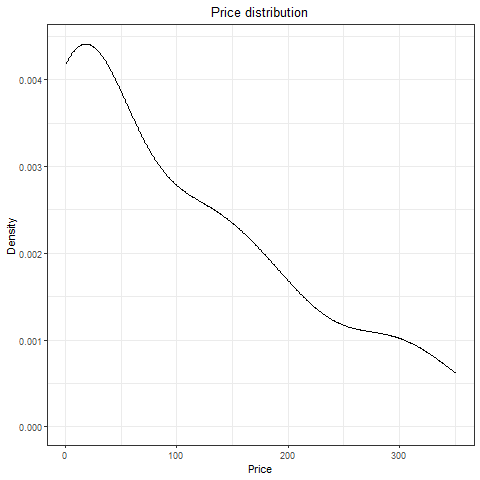

In [13]:
%%R -i products

#install ggplot2 if you need to
install.packages("ggplot2", repos='http://cran.us.r-project.org', quiet=TRUE)
library(ggplot2)
#use ggplot to plot the distribution
ggplot(products, aes(x=price)) + geom_density() + theme_bw() + labs(title = 'Price distribution', 
       x = 'Price', y = 'Density') + theme(plot.title = element_text(hjust = 0.5))



In [14]:
%%R

#save the plot
ggsave("price_histogram.png", width=6.5, height=3)

**Step 6:** Write a function called `filter_reviews` with one argument called `products` to find all the reviews that match the products which match the key phrase query. It should return a data frame with one review per row and three columns: `product.id`, `rating` (on the 5-star scale), and `review` (text).

In [15]:
def filter_reviews(key_phrase):
    data = {'product.id':[], 'rating':[],'review':[]}
    data_review = open('reviews.json')
    for line in data_review:
        if key_phrase in line:
            review_dict = demjson.decode(line)
            data['product.id'].append(review_dict['asin'])
            data['rating'].append(review_dict['overall'])
            data['review'].append(review_dict['reviewText'])
    df = pd.DataFrame(data)
    return df

In [16]:
#filter reviews by the produts of interest
reviews = pd.DataFrame()
for keyword in ['smartpen', 'Smartpen', 'smart pen', 'Smart Pen', 'Smart Notebook']:
    data = filter_reviews(keyword)
    reviews = reviews.append(data, ignore_index = True)
reviews.head()

,product.id,rating,review
0,B001AALJ1I,5.0,Purchased these for my high-school aged son. T...
1,B001AALJ1I,5.0,The Livescribe Pulse Smartpen is one componen...
2,B001AALJ1I,5.0,I purchased these for my smartpen and they're ...
3,B001AALJ1I,4.0,I bought these first set of notebooks along wi...
4,B001AAOZU0,1.0,"I love my smartpen, but these pen refills are ..."


In [17]:
len(reviews)

449

**Step 7:** Summarize the reviews into a data frame called `review_summaries` with three columns: `product.id`, `count` for the number of reviews, and `ave.rating` for the mean rating.

In [18]:
reviews_counts = reviews.groupby('product.id').size().reset_index(name='counts')
reviews_rating = reviews.groupby('product.id').rating.mean().reset_index(name='ave.rating')
review_summaries = pd.merge(reviews_counts, reviews_rating, left_on='product.id', right_on='product.id', how='inner')
review_summaries.head()

,product.id,counts,ave.rating
0,B00009ZIOF,1,5.0
1,B0001DBEM4,1,5.0
2,B000652M6Y,1,3.0
3,B000FMJLQC,1,2.0
4,B000MUP69I,1,4.0


In [19]:
review_summaries.shape

(89, 3)

**Step 8:** Merge `review_summaries` with `products` on the `product.id` variable.

In [20]:
product_with_review = pd.merge(products, review_summaries, left_on='product.id', right_on='product.id', how='inner')
product_with_review.head()

,product.id,price,counts,ave.rating
0,B001AAOZHI,289.99,22,4.727273
1,B001AAN4PW,289.99,35,4.171429
2,B001QR6FN2,117.57,1,2.000000
3,B001R4KB66,17.06,2,5.000000
4,B002DJTMSW,117.57,12,4.500000


In [21]:
product_with_review.shape

(16, 4)

**Step 9:** Plot a scatterplot of the review summaries with price on the x-axis, the average rating on the y axis, and the size of each point being the number of reviews. Add labels for the product ids, but fix the label size to be the same for all products.

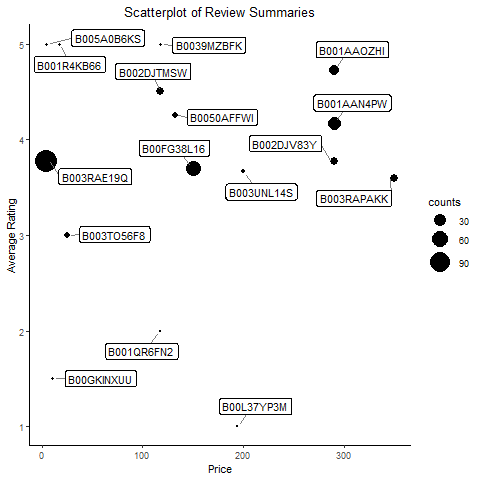

In [22]:
%%R -i product_with_review

#import ggplot2 and ggrepel
library(ggplot2)
install.packages("ggrepel", quiet=TRUE)
library(ggrepel)

review_plot = ggplot(product_with_review, aes(x=price, y=ave.rating))
reviews_summary = review_plot + geom_point(aes(size = counts)) + 
  geom_label_repel(aes(label = product.id), box.padding = 0.35, point.padding = 0.5,
                   segment.color = 'grey50') + theme_classic() +
  labs(title = 'Scatterplot of Review Summaries', 
       x = 'Price', y = 'Average Rating') + 
  scale_size_continuous(range = c(0.1,10)) + 
  theme(plot.title = element_text(hjust = 0.5))
reviews_summary

In [23]:
%%R

#save the plot
ggsave("reviews_summary.png", width=6.5, height=4)

**Step 10:** Write function `filter_products_by_id` that takes in a product identifier argument `idx` and returns returns the matching product information from `products.json`.

In [24]:
def filter_products_by_id(idx):
    data = {'product.id':[], 'rating':[],'review':[]}
    data_review = open('reviews.json')
    for line in data_review:
        if idx in line:
            review_dict = demjson.decode(line)
            data['product.id'].append(review_dict['asin'])
            data['rating'].append(review_dict['overall'])
            data['review'].append(review_dict['reviewText'])
    df = pd.DataFrame(data)
    return df

**Step 11:** Using the plot from Step 9, the `filter_products_by_id` function, and the `review_summaries` data frame, identify 3 competitor products in different price ranges and extract the relevant information.

In [25]:
low_price = filter_products_by_id('B003RAE19Q')
mid_price = filter_products_by_id('B00FG38L16')
high_price = filter_products_by_id('B001AAN4PW')

In [26]:
high_price.head()

,product.id,rating,review
0,B001AAN4PW,5.0,I picked this up for the wife as I have one al...
1,B001AAN4PW,5.0,So I've been using my Pulse for about six mont...
2,B001AAN4PW,5.0,For college students unable or unwilling to lu...
3,B001AAN4PW,1.0,Please be advised that items from Livescribe h...
4,B001AAN4PW,2.0,When I run the desktop manager on my windows v...


In [27]:
mid_price.head()

,product.id,rating,review
0,B00FG38L16,1.0,I bought this pen and it arrived today. Unfort...
1,B00FG38L16,2.0,I've never been a big fan of the Livescribe sm...
2,B00FG38L16,4.0,The Livescribe 3 has its problems and limitati...
3,B00FG38L16,4.0,and then I used the writing-to-text conversion...
4,B00FG38L16,4.0,How does it work? That's the one thing I wante...


In [28]:
low_price.head()

,product.id,rating,review
0,B003RAE19Q,4.0,I was skeptical that this pen would perform as...
1,B003RAE19Q,1.0,-the voice is not clear at all .- battrey has ...
2,B003RAE19Q,3.0,I was considering Livescribe a couple of years...
3,B003RAE19Q,1.0,I purchased my ECHO about a month ago and it h...
4,B003RAE19Q,3.0,I received my pen from Amazon earlier last mon...


In [ ]:
#save the dataframe for further investigation
high_price.to_csv(r'C:\Users\xuebi\Desktop\high_product.csv')
mid_price.to_csv(r'C:\Users\xuebi\Desktop\mid_price.csv')
low_price.to_csv(r'C:\Users\xuebi\Desktop\low_price.csv')

**Step 12:** Text Analysis using NLTK, clean the text data by removing stopwords, stemming, or lemmatization

In [33]:
#install NLTK if you need to
!pip install nltk

In [30]:
#import NLTK
import nltk
#download 'punkt', 'stopwords', and 'wordnet' if you need to
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
#Word Tokenization: Word tokenizer breaks text paragraph into words.
from nltk.tokenize import word_tokenize

low_price['tokenized_review'] = low_price['review'].apply(word_tokenize)
low_price.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\xuebi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\xuebi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\xuebi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,product.id,rating,review,tokenized_review
0,B003RAE19Q,4.0,I was skeptical that this pen would perform as...,"[I, was, skeptical, that, this, pen, would, pe..."
1,B003RAE19Q,1.0,-the voice is not clear at all .- battrey has ...,"[-the, voice, is, not, clear, at, all, .-, bat..."
2,B003RAE19Q,3.0,I was considering Livescribe a couple of years...,"[I, was, considering, Livescribe, a, couple, o..."
3,B003RAE19Q,1.0,I purchased my ECHO about a month ago and it h...,"[I, purchased, my, ECHO, about, a, month, ago,..."
4,B003RAE19Q,3.0,I received my pen from Amazon earlier last mon...,"[I, received, my, pen, from, Amazon, earlier, ..."


In [31]:
#remove stop words
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))
#update the stop_words list to remove other words that you don't need
stop_words.update(['pen', 'note', 'would', 'notebook', 'like', 'get', 'also'])

cleaned_tokenized_review = []
for review in low_price['tokenized_review']:
    for word in review:
        #convert all words to lower case
        word = word.lower()
        #remove stop_words and punctuation 
        if word not in stop_words and word.isalpha() == True:
            cleaned_tokenized_review.append(word)
            
#print the the tokenized review without stop words
print(cleaned_tokenized_review[:10])

['skeptical', 'perform', 'well', 'ads', 'stated', 'gave', 'try', 'impressed', 'function', 'smartpen']


In [32]:
# Stemming: Stemming is a process of linguistic normalization, which reduces words to their word root word or chops off the derivational affixes. 
from nltk.stem import PorterStemmer

ps = PorterStemmer()
stemmed_tokenized_review=[]
for word in cleaned_tokenized_review:
    stemmed_tokenized_review.append(ps.stem(word))
print(stemmed_tokenized_review[:10])

['skeptic', 'perform', 'well', 'ad', 'state', 'gave', 'tri', 'impress', 'function', 'smartpen']


In [33]:
#Lemmatization: Lemmatization reduces words to their base word, which is linguistically correct lemmas.
from nltk.stem.wordnet import WordNetLemmatizer

lem = WordNetLemmatizer()
lemmatized_tokenized_review=[]
for word in cleaned_tokenized_review:
    lemmatized_tokenized_review.append(lem.lemmatize(word))
print(lemmatized_tokenized_review[:10])

['skeptical', 'perform', 'well', 'ad', 'stated', 'gave', 'try', 'impressed', 'function', 'smartpen']


**Step 13:** Check the Frequency Distribution of each words in reviews

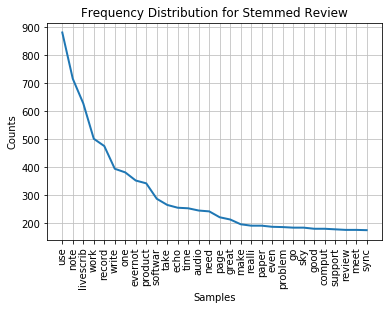

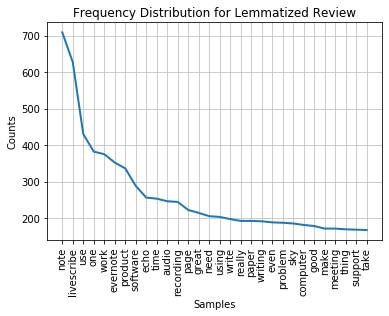

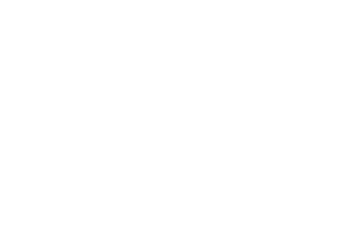

In [35]:
import matplotlib.pyplot as plt
from nltk.probability import FreqDist

fdist_stemmed_review = FreqDist(stemmed_tokenized_review)
fdist_lemmatized_review = FreqDist(lemmatized_tokenized_review)

plt.title("Frequency Distribution for Stemmed Review")
dist_stemmed = fdist_stemmed_review.plot(30,cumulative=False)

plt.title("Frequency Distribution for Lemmatized Review")
fdist_lemmatized_review.plot(30,cumulative=False)
plt.axis('off')
plt.show()

In [ ]:
#install wordcloud if you need to
!pip install wordcloud 

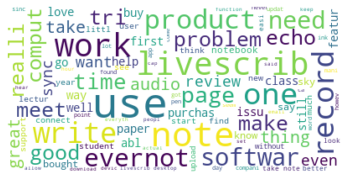

In [36]:
#build word cloud to highlight the most frequent words
from wordcloud import WordCloud

#build a bag of words for would cloud
stemmed_words_bag = ' '.join(stemmed_tokenized_review)

stemmed_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(stemmed_words_bag)
plt.figure()
plt.imshow(stemmed_wordcloud, interpolation="bilinear")
plt.axis("off")

plt.show()

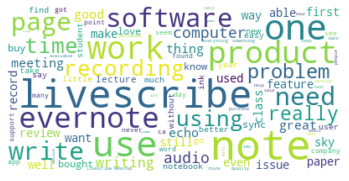

In [37]:
#build a bag of words for would cloud
lemmatized_words_bag = ' '.join(lemmatized_tokenized_review)

lemmatized_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(lemmatized_words_bag)
plt.figure()
plt.imshow(lemmatized_wordcloud, interpolation="bilinear")
plt.axis("off")

plt.show()

**Step 14:** Sentiment Analysis: Develop a classification model, which is trained using the pre-labeled dataset of positive, 
negative, and neutral. I will use Multi-Nomial Naive Bayes Classification with scikit-learn.

In [38]:
#We use the training dataset from Kaggle to build our prediction model
#you can download this data from https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews/data
#this dataset is about Movie Reviews and I believe the sentiment regarding a movie review should be similar to the sentiment regarding a product

movie = pd.read_csv('train data of movie reviews.tsv', sep = '\t')
movie.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


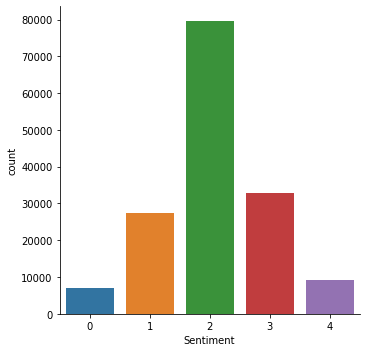

In [39]:
#check the distribution of the review sentiments
import seaborn as sns

sns.catplot(x = "Sentiment", data = movie, kind = "count")
plt.show()

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.naive_bayes import MultinomialNB

#build a Tokenizer to clean the text data
Tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+')

#build a Vectorizer that help vectorized our cleaned text data
#note that we specify max_features to eliminate the potential issues of dimension mismatch in prediction part
Vectorizer = CountVectorizer(lowercase = True, #lower case all the words
                             stop_words = stop_words, #remove english stop_words and the updated words we specified before
                             ngram_range = (1,1), #specify the lower and upper boundary of the range of n-values for different word n-grams or char n-grams to be extracted
                             tokenizer = Tokenizer.tokenize, #specify the tokenizer we used to tokenize the word
                             max_features = 1000)

X_train = Vectorizer.fit_transform(movie['Phrase']) #build the train variable for the model
y_train = movie['Sentiment'] #build the target variable using the Sentiment in the movie dataset

Trained_NB_classifier = MultinomialNB().fit(X_train, y_train) #build the Naive Bayes classifier for prediction

**Step 15:** Sentiment Prediction: Use the Naive Bayes classifier we built above to predict the sentiment of each review

In [41]:
#sentiment prediction
X_test = Vectorizer.transform(low_price['review']) #Tokenize and Vectorize our X_test for sentiment prediction
#note that we need to use transform instead of fit_transform, because we want to transform documents to document-term matrix, but we don't want to fit these documents according to our train dataset.
#more explanation could be found here https://stackoverflow.com/questions/38692520/what-is-the-difference-between-fit-transform-and-transform-in-sklearn-countvecto
low_price['predicted_sentiment'] = Trained_NB_classifier.predict(X_test)

In [42]:
#check the head of the updated dataset
low_price.head()

,product.id,rating,review,tokenized_review,predicted_sentiment
0,B003RAE19Q,4.0,I was skeptical that this pen would perform as...,"[I, was, skeptical, that, this, pen, would, pe...",3
1,B003RAE19Q,1.0,-the voice is not clear at all .- battrey has ...,"[-the, voice, is, not, clear, at, all, .-, bat...",2
2,B003RAE19Q,3.0,I was considering Livescribe a couple of years...,"[I, was, considering, Livescribe, a, couple, o...",2
3,B003RAE19Q,1.0,I purchased my ECHO about a month ago and it h...,"[I, purchased, my, ECHO, about, a, month, ago,...",0
4,B003RAE19Q,3.0,I received my pen from Amazon earlier last mon...,"[I, received, my, pen, from, Amazon, earlier, ...",2


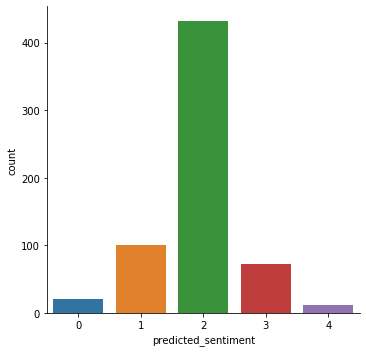

In [43]:
#check the sentiment distribution of the reviews for low-price smart pen
#we can see that the majority of the customers are satisfied
sns.catplot(x="predicted_sentiment", data=low_price, kind="count")
plt.show()

**Furthermore** I only picked the competitor in the lower price range to do the sentiment analysis. It seems that most of the customers are satisfied and they care about the Livescribe paper-based computing platform and the smartpen could be applied in their workplace.

If we want to explore more sentiment analysis for the competitor in the middle price range or that in the higher price range, we can slightly change the code to do that. Besides, we can also combine all the reviews for Smartpen products to do a market sentiment analysis.

If you are interested in other products like iPhone, Dell XPS, or even Markers, you can just change the keyword and apply the functions that I developed above. I hope you enjoy your journey of market research.